## Module 1 — Global Clinical Trial Initiation Trends (2015–2025)

Folders ready: ../data/processed ../figures

Fetching total number of trials initiated each year (2015–2025)...
2015: 24,104
2016: 27,785
2017: 29,175
2018: 30,945
2019: 32,510
2020: 36,721
2021: 37,013
2022: 38,022
2023: 39,710
2024: 43,674
2025: 42,971

Saved total yearly counts to: ../data/processed/global_trials_totalcount_by_year_2015_2025.csv


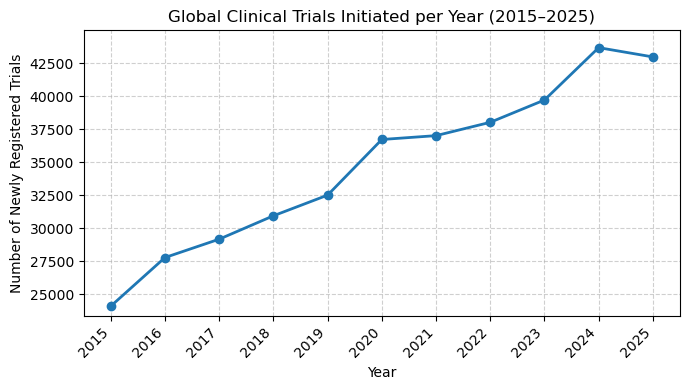

Saved figure to: ../figures/global_trials_totalcount_by_year_2015_2025.png

Summary:
- Retrieved total counts of newly registered trials per year (2015–2025).
- Each point reflects all studies first posted on ClinicalTrials.gov in that calendar year.


In [5]:
# Module 1 — Global Clinical Trial Initiation Trends (2015–2025)

# === Import libraries ===
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

# === Setup directories ===
PROCESSED_DIR = "../data/processed"
FIG_DIR = "../figures"
os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(FIG_DIR, exist_ok=True)

print("Folders ready:", PROCESSED_DIR, FIG_DIR)

# === Base URL ===
BASE_URL = "https://clinicaltrials.gov/api/v2/studies"

# === Query years: 2015–2025 ===
YEARS = list(range(2015, 2026))  # 2015, 2016, ..., 2025
year_counts = {}

print("\nFetching total number of trials initiated each year (2015–2025)...")

for y in YEARS:
    start = f"{y}-01-01"
    end = f"{y}-12-31"
    params = {
        "query.term": f"AREA[StudyFirstPostDate]RANGE[{start},{end}]",
        "countTotal": "true",
        "pageSize": 1,   # only need totalCount
        "format": "json"
    }

    resp = requests.get(BASE_URL, params=params, timeout=20)
    resp.raise_for_status()
    data = resp.json()
    total = data.get("totalCount", 0)
    year_counts[y] = total
    print(f"{y}: {total:,}")

# === Convert to DataFrame ===
df = pd.DataFrame(list(year_counts.items()), columns=["Year", "TrialCount"])
df.sort_values("Year", inplace=True)

# === Save results ===
output_csv = os.path.join(PROCESSED_DIR, "global_trials_totalcount_by_year_2015_2025.csv")
df.to_csv(output_csv, index=False)
print("\nSaved total yearly counts to:", output_csv)

# === Plot ===
plt.figure(figsize=(7, 4))
plt.plot(df["Year"], df["TrialCount"], marker="o", linewidth=2)

plt.title("Global Clinical Trials Initiated per Year (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Number of Newly Registered Trials")

# Zoom y-axis around the data range
y_min = df["TrialCount"].min() * 0.97
y_max = df["TrialCount"].max() * 1.03
plt.ylim(y_min, y_max)

plt.grid(True, linestyle="--", alpha=0.6)

ax = plt.gca()
ticks = df["Year"].tolist()
labels = [str(y) for y in ticks]
labels[-1] = "2025" 
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha="right")

plt.tight_layout()

output_fig = os.path.join(FIG_DIR, "global_trials_totalcount_by_year_2015_2025.png")
plt.savefig(output_fig)
plt.show()

print("Saved figure to:", output_fig)

print("\nSummary:")
print("- Retrieved total counts of newly registered trials per year (2015–2025).")
print("- Each point reflects all studies first posted on ClinicalTrials.gov in that calendar year.")

In [6]:
import os
output_csv = "../data/processed/global_trials_totalcount_by_year_2015_2025.csv"
print("abs path:", os.path.abspath(output_csv))
print("exists? :", os.path.exists(output_csv))

abs path: /Users/Hanjing1/JupyterProjects/global-clinical-trial-trends/data/processed/global_trials_totalcount_by_year_2015_2025.csv
exists? : True
